In [164]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import matplotlib.cm as cm

# module required to install
!pip install mlxtend
!pip install pydotplus
!pip install scikit-surprise
!pip install xgboost
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [165]:
Train = pd.read_excel("Data_Train.xlsx")
Test=pd.read_excel("Data_Test.xlsx")

In [166]:
Train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [167]:
Test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [168]:
Train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [169]:
Train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [170]:
## Calculating Column wise Percentage of NAs
NA_col = pd.DataFrame(Train.isna().sum(), columns = ['NA_Count'])
NA_col['% of NA'] = (NA_col.NA_Count/len(Train))*100
NA_col.sort_values(by = ['% of NA'], ascending = False, na_position = 'first')

,NA_Count,% of NA
New_Price,5195,86.310018
Seats,42,0.697790
Engine,36,0.598106
Power,36,0.598106
Mileage,2,0.033228
Name,0,0.000000
Location,0,0.000000
Year,0,0.000000
Kilometers_Driven,0,0.000000
Fuel_Type,0,0.000000


In [173]:
Train.shape

(6019, 13)

In [174]:
Test.shape

(1234, 12)

In [175]:
Train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [176]:
Train['Mileage']=Train['Mileage'].astype(str).str.replace('kmpl','')
Train['Mileage']=Train['Mileage'].astype(str).str.replace('km/kg','')
Train['Engine']=Train['Engine'].astype(str).str.replace('CC','')
Train['Power']=Train['Power'].astype(str).str.replace('bhp','')
Train['Power']=Train['Power'].astype(str).str.replace('nan','0')
Train['Power']=Train['Power'].astype(str).str.replace('null','0')
Test['Mileage']=Test['Mileage'].astype(str).str.replace('kmpl','')
Test['Mileage']=Test['Mileage'].astype(str).str.replace('km/kg','')
Test['Engine']=Test['Engine'].astype(str).str.replace('CC','')
Test['Power']=Test['Power'].astype(str).str.replace('bhp','')
Test['Power']=Test['Power'].astype(str).str.replace('nan','0')
Test['Power']=Test['Power'].astype(str).str.replace('null','0')


In [177]:
Train['Mileage']=Train['Mileage'].astype(str).astype(float)
Train['Engine']=Train['Engine'].astype(str).astype(float)
Train['Power']=Train['Power'].astype(str).astype(float)
Test['Mileage']=Test['Mileage'].astype(str).astype(float)
Test['Engine']=Test['Engine'].astype(str).astype(float)
Test['Power']=Test['Power'].astype(str).astype(float)

In [178]:
Train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                   0
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [179]:
Train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
dtype: object

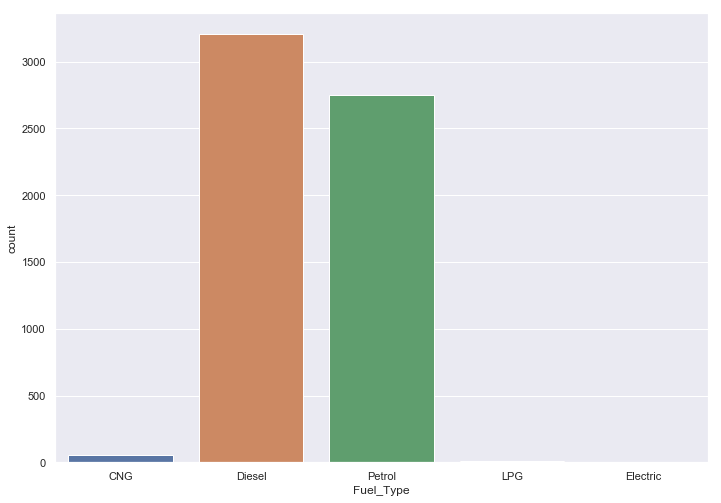

In [137]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.countplot(data=Train, x = 'Fuel_Type')

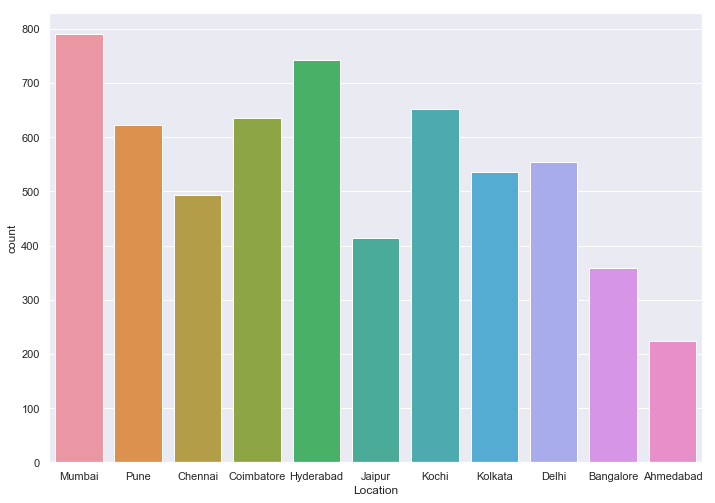

In [138]:
p = sns.countplot(data=Train, x = 'Location')

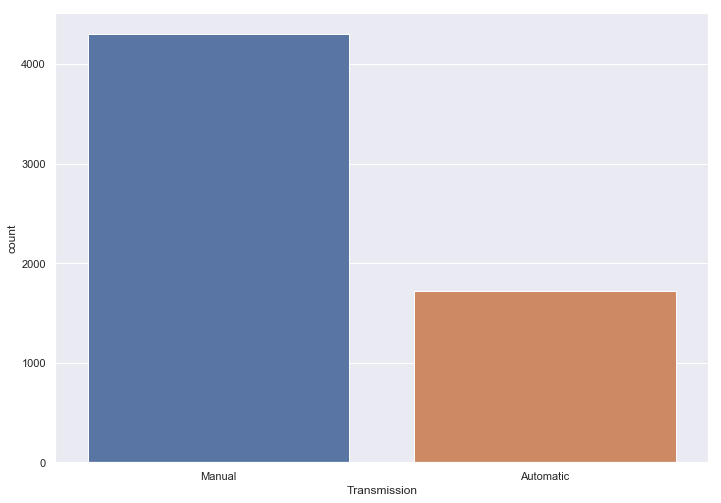

In [139]:
p = sns.countplot(data=Train, x = 'Transmission')

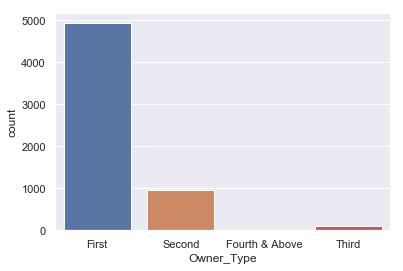

In [180]:
p = sns.countplot(data=Train, x = 'Owner_Type')

In [182]:
rs = np.random.RandomState(0)
corr = Train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1,-0.17,0.32,-0.052,0.085,0.012,0.31
Kilometers_Driven,-0.17,1,-0.065,0.091,0.023,0.083,-0.011
Mileage,0.32,-0.065,1,-0.6,-0.42,-0.31,-0.31
Engine,-0.052,0.091,-0.6,1,0.84,0.39,0.66
Power,0.085,0.023,-0.42,0.84,1,0.11,0.75
Seats,0.012,0.083,-0.31,0.39,0.11,1,0.052
Price,0.31,-0.011,-0.31,0.66,0.75,0.052,1


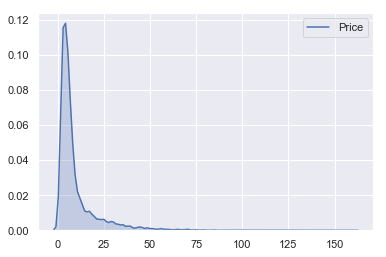

In [229]:
sns.kdeplot(Train['Price'], shade=True)

In [231]:
sns.boxplot( x=Train["Location"], y=Train["Price"] )

KeyError: 'Location'

In [183]:
Train.drop(['New_Price'], axis = 1, inplace = True)
Test.drop(['New_Price'], axis = 1, inplace = True)

In [184]:
Train.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'], axis = 1, inplace = True)
Test.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'], axis = 1, inplace = True)

In [185]:
print("\nThe train data size after dropping Id feature is : {} ".format(Train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(Test.shape))


The train data size after dropping Id feature is : (6019, 7) 
The test data size after dropping Id feature is : (1234, 6) 


In [186]:
Train = Train[np.isfinite(Train['Engine'])]
Train = Train[np.isfinite(Train['Seats'])]
Train = Train[np.isfinite(Train['Mileage'])]
Test = Test[np.isfinite(Test['Engine'])]
Test = Test[np.isfinite(Test['Seats'])]

In [187]:
Train.isnull().sum()

Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [188]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(Train, test_size = 0.3, random_state = 1920)

In [189]:
X_train = train.copy().drop('Price', axis = 1)
y_train = train['Price']
X_test = test.copy().drop('Price', axis = 1)
y_test = test['Price']

In [190]:
num_cols=["Year","Kilometers_Driven","Mileage","Engine","Power","Seats"]

In [191]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [153]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(Test[num_cols])
Test[num_cols] = scaler.transform(Test[num_cols])

In [192]:
X_train.shape

(4182, 6)

In [193]:
X_test.shape

(1793, 6)

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
# Model initialization
## Linear Regression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
# Predict
y_train_predicted = LinReg.predict(X_train)

In [202]:
y_train_predicted

array([ 2.02770653, -8.45328694,  7.39453929, ...,  4.59716842,
       19.36675591,  7.46612214])

In [199]:
# Predict on X_test
y_test_predicted = LinReg.predict(X_test)

In [203]:
y_test_predicted

array([14.26990172,  0.65167861, -7.63414412, ..., -0.396012  ,
        1.47243552, 17.38993711])

In [204]:
# model evaluation
rmse = mean_squared_error(y_train, y_train_predicted)
r2 = r2_score(y_train, y_train_predicted)

In [205]:
# printing values

# variance score: 1 means perfect prediction 

print('Intercept:', LinReg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', round(r2,2)*100)

Intercept: 9.465083692013502
Root mean squared error:  41.416778454689286
R2 score:  67.0


In [206]:
# model evaluation
rmse_test = mean_squared_error(y_test, y_test_predicted)
r2_test = r2_score(y_test, y_test_predicted)

In [163]:

print('Root mean squared error: ', rmse_test)
print('R2 score: ', round(r2_test,2)*100)

Root mean squared error:  44.730673793193546
R2 score:  65.0


In [216]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X = X_train,y = y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [217]:
pred_train_reg_ = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)
Test_Pred_RF=rfc.predict(Test)

In [220]:
rmse_test_rf = mean_squared_error(y_test, test_predictions)

In [223]:
r2_test_rf = r2_score(y_test, test_predictions)

In [221]:
print('Root mean squared error: ', rmse_test_rf)

Root mean squared error:  20.27270524462373


In [224]:
print('R2 score: ', round(r2_test_rf,2)*100)

R2 score:  84.0


In [209]:
def mean_absolute_percentage_error(y_train, pred_train_reg_): 
    y_train, pred_train_reg_ = np.array(y_train), np.array(pred_train_reg_)
    return np.mean(np.abs((y_train - pred_train_reg_) / y_train)) * 100

In [211]:
mean_absolute_percentage_error(y_train, pred_train_reg_)

8.051291345429904

In [212]:
def mean_absolute_percentage_error(y_test, test_predictions): 
    y_test, test_predictions = np.array(y_test), np.array(test_predictions)
    return np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

In [213]:
mean_absolute_percentage_error(y_test, test_predictions)

21.79955310887339

In [228]:
pred_test_RandomForest= pd.DataFrame(Test_Pred_RF, columns=['Price']).to_excel('prediction_RandomForest.xlsx')